# Tasks

1. From which location most pickup request are come from?
2. At which time of a day maximum people call for uber than any other time?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
#load the data
df=pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.shape

(6745, 6)

In [4]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
df.isna()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6740,False,False,True,False,False,True
6741,False,False,True,False,False,True
6742,False,False,True,False,False,True
6743,False,False,True,False,False,True


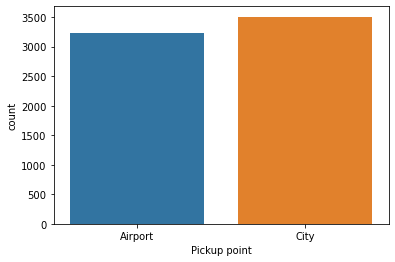

In [6]:
ax = sns.countplot(x="Pickup point", data=df)

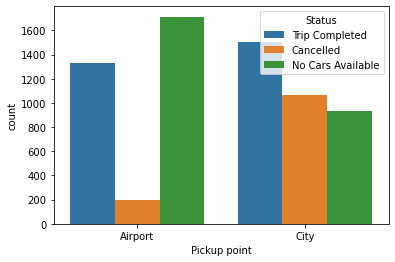

In [7]:
ax = sns.countplot(x="Pickup point", hue="Status", data=df)

In [8]:
df.Status.unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [9]:
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [10]:
df['Driver id'].value_counts()

27.0     22
177.0    21
22.0     21
176.0    21
84.0     21
         ..
143.0     8
123.0     7
42.0      7
300.0     6
265.0     6
Name: Driver id, Length: 300, dtype: int64

In [11]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True)

In [12]:
df['Request timestamp'].head()

0   2016-07-11 11:51:00
1   2016-07-11 17:57:00
2   2016-07-12 09:17:00
3   2016-07-12 21:08:00
4   2016-07-13 08:33:16
Name: Request timestamp, dtype: datetime64[ns]

In [13]:
df['day'] = df['Request timestamp'].apply(lambda x: x.day)
df['hour1'] = df['Request timestamp'].apply(lambda x: x.hour)
df['minute1'] = df['Request timestamp'].apply(lambda x: x.minute)

In [14]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,day,hour1,minute1
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,11,11,51
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,11,17,57
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,12,9,17
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,12,21,8
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,13,8,33


In [15]:
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True)

In [16]:
df['day'] = df['Drop timestamp'].apply(lambda x: x.day)
df['hour2'] = df['Drop timestamp'].apply(lambda x: x.hour)
df['minute2'] = df['Drop timestamp'].apply(lambda x: x.minute)

In [17]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,day,hour1,minute1,hour2,minute2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,11,51,13.0,0.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11.0,17,57,18.0,47.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12.0,9,17,9.0,58.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12.0,21,8,22.0,3.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13.0,8,33,9.0,25.0


In [18]:
df['hour']=df['hour2']-df['hour1']
df['minute']=df['minute2']-df['minute1']

In [19]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,day,hour1,minute1,hour2,minute2,hour,minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,11,51,13.0,0.0,2.0,-51.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11.0,17,57,18.0,47.0,1.0,-10.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12.0,9,17,9.0,58.0,0.0,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12.0,21,8,22.0,3.0,1.0,-5.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13.0,8,33,9.0,25.0,1.0,-8.0


In [20]:
df.drop(['hour1','hour2','minute1','minute2'],axis=1,inplace=True)

In [21]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,day,hour,minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,2.0,-51.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11.0,1.0,-10.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12.0,0.0,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12.0,1.0,-5.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13.0,1.0,-8.0


In [22]:
df['Request Time'] = df["Request timestamp"].dt.time
df['Request Weekday'] = df['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df['Request Hour'] = df['Request timestamp'].apply(lambda x: x.hour)

In [23]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,day,hour,minute,Request Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,2.0,-51.0,11:51:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11.0,1.0,-10.0,17:57:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12.0,0.0,41.0,09:17:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12.0,1.0,-5.0,21:08:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13.0,1.0,-8.0,08:33:16,Wednesday,8


In [24]:
df['Request Hour'].unique()

array([11, 17,  9, 21,  8,  6,  5, 12,  4, 14, 22, 10, 18, 15,  2, 13, 16,
       19,  7, 20,  0,  3, 23,  1], dtype=int64)

In [25]:
df['Request Weekday'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [26]:
df.drop(['day','hour', 'minute'], axis=1,inplace=True)

In [28]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,Wednesday,8


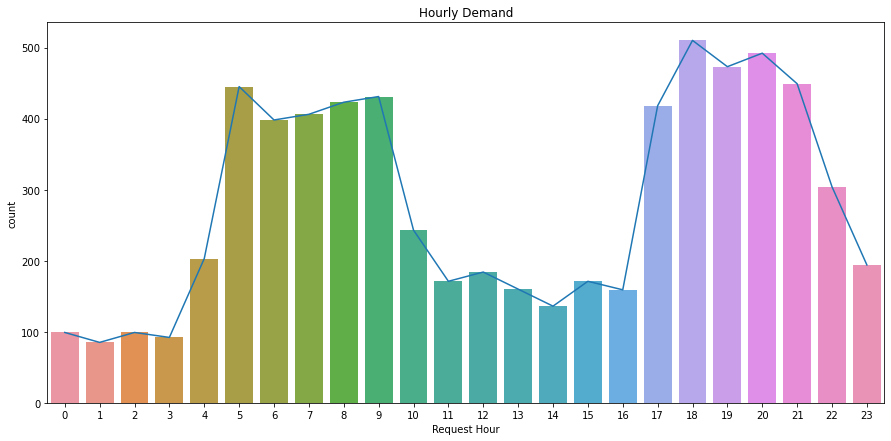

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Hourly Demand')
df.groupby(df['Request Hour']).count()['Request id'].plot(ax=ax)
sns.countplot(df['Request Hour'])

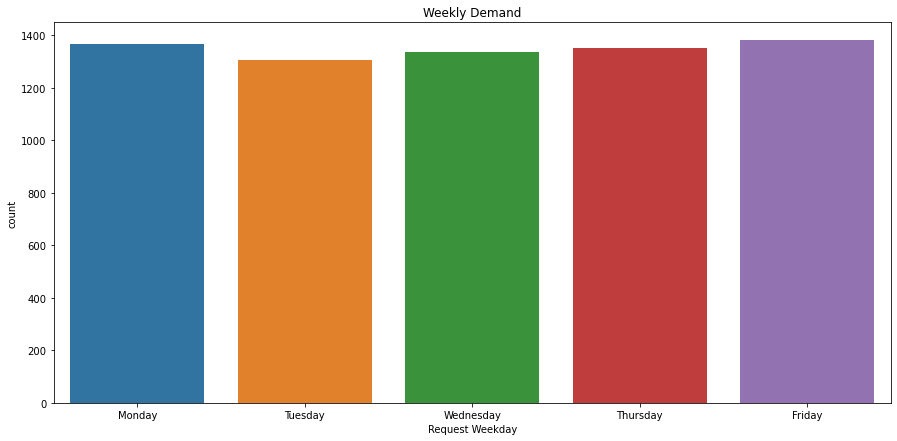

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Weekly Demand')
df.groupby(df['Request Weekday']).count()['Request id']
sns.countplot(df['Request Weekday'])

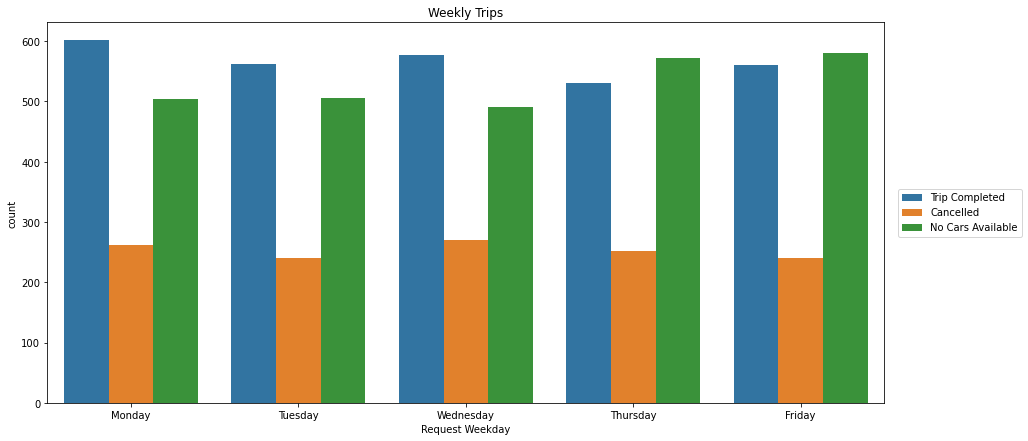

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Weekly Trips')
ax = sns.countplot(x='Request Weekday',hue='Status',data=df)
plt.legend(bbox_to_anchor=(1.17, 0.5),loc='right')